In [1]:
# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

In [2]:
# make sure the plots display in the cells 
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Load in csv
# pyber_ride_df = pd.read_csv("resources/PyBer_ride_data.csv")
# pyber_ride_df

In [3]:
#load files 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"


In [4]:
#read csv files into a DataFrame 
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# read ride_data.csv file into a DataFrame 
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(5)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
# #plot months on the x_axis, avg fare on the y_axis 
# pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
# plt.show()

In [7]:
#inspect data to make sure that non of the columns have null values 
# starting with the city_data.csv
# Get all the rows that contain null values.
# use count() or chain together isnull().sum()
city_data_df.count()
# city_data_df.isnull().sum()

# Find out how many data points there are for each type of city.

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Make sure the driver_count column has an integer data type.
#get the data type of each column 
# this property doesnt need (), will get error if added () in
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Find out how many data points there are for each type of city.
# find out the city type first 
# use the unique to get all the unique values of the "type" column for city types. 
# this will return an array / list of the city types 

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Find out how many data points there are for each type of city.
# use sum() method on the df for the 'type' column 
# can't have all of them in one cell :(

sum(city_data_df["type"] =="Urban")
# sum(city_data_df["type"] =="Suburban")
# sum(city_data_df["type"] =="Rural")

66

In [11]:
sum(city_data_df["type"] =="Suburban")


36

In [12]:
sum(city_data_df["type"] =="Rural")

18

In [13]:
#inspect the ride df 
#find out if there are null values in the df 

ride_data_df.isnull().sum()


city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#inspect the ride df 
# find out the datatypes of each column 
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#merge the dfs 
# they share the same "city" column 
#the syntax to merge df: new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
#how= parameter indicates if we want to merge L, R, inner, or outer, the dafault is inner 


city_ride_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

city_ride_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
# still not too sure what the 'how=' parameter does... 
# city_ride_df = pd.merge(ride_data_df, city_data_df, how = "inner", on = ["city", "city"])
# city_ride_df

In [17]:
# For the bubble chart, we will need to plot the following:
# The average fare for each type of city on the y-axis
# The total number of rides for each type city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city   

In [18]:
#first get the average for each city type 
#create df for each city type: urban, suburban, and rural 

urban_cities_df = city_ride_df[city_ride_df["type"]=="Urban"]
urban_cities_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [24]:
#create df for each city type: suburban

suburban_cities_df = city_ride_df[city_ride_df["type"] =="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [23]:
#create df for each city type: rural 
rural_cities_df = city_ride_df[city_ride_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
#get the number of rides per city type
#create a series where the city type is the index then use count() 

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
#get the number of rides for suburban cities 
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [32]:
#get the number of rides for rural cities 
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [33]:
#find the average fare cost for each city type
#find the average fare cost for urban 
urban_ride_avg = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ride_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
suburban_ride_avg = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ride_avg.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [35]:
rural_ride_avg = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ride_avg.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [36]:
#find the avg # of drivers per city type 
urban_drivers_avg = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_drivers_avg.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
suburban_drivers_avg = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_drivers_avg.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [38]:
rural_drivers_avg = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_drivers_avg.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

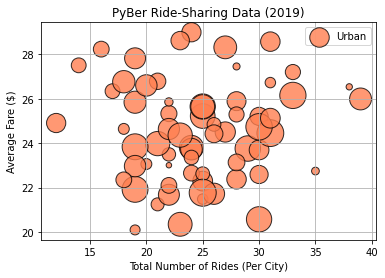

In [47]:
#create a bubble chart with the calculated results 
# average for each individual city type driver count == size of the bubbles on the plot 
# number of rides per city type == x_axis 
# average of fare charges per city type == y_axis 

#create scatter plots 
plt.scatter(urban_ride_count, urban_ride_avg, s = 10* urban_drivers_avg, c = "coral",
            edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Urban" ) 

# to change the size of the bubbles to the 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

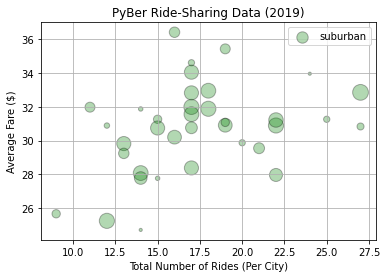

In [52]:
#create the scatter plot for suburban cities 
plt.scatter(suburban_ride_count, suburban_ride_avg, s = 10*suburban_drivers_avg, 
            c = "green", edgecolor = "black", linewidths = 1 , alpha = 0.3, label = "suburban") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

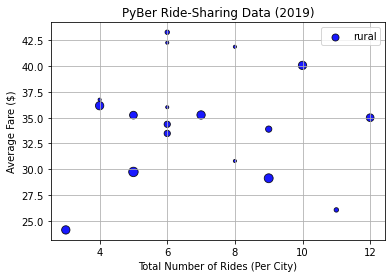

In [54]:
#create the scatter plot for the rural cities 
plt.scatter(rural_ride_count, rural_ride_avg, s = 10*rural_drivers_avg, 
            c = "blue", edgecolor = "black", linewidths = 0.8 , alpha = 0.9, label = "rural") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

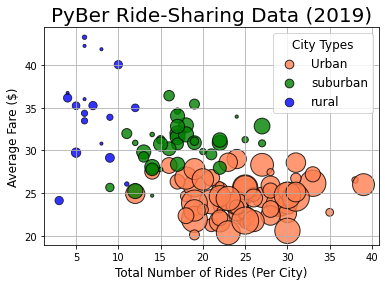

In [72]:
#combining all the bubble charts into one massive chart 
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_ride_avg, s = 10* urban_drivers_avg, c = "coral",
            edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Urban" ) 
plt.scatter(suburban_ride_count, suburban_ride_avg, s = 10*suburban_drivers_avg, 
            c = "green", edgecolor = "black", linewidths = 1 , alpha = 0.8, label = "suburban") 
plt.scatter(rural_ride_count, rural_ride_avg, s = 10*rural_drivers_avg, 
            c = "blue", edgecolor = "black", linewidths = 0.8 , alpha = 0.8, label = "rural") 

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# problem: the legend size for each city is determined by the size of the bubbles which is determined by the "driver_average" size 
# to fix this we need to set it equal to a legend variable 
# fontsize = 
#expand the legend horizontally using the "mode" to fit the area 
#scatterpoints =1,  number of scatter points in the legend for each marker to be 1
# loc = "best", location setting to fit the best based on the plotting of data points 
#We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes 
# attribute and list indexing in the brackets to reference one of the three scatter plots. 

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Show the plot
plt.show()

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("resources/Fig1.png")



In [73]:
#summary stat analysis 

urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [78]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [77]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [76]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [79]:
urban_ride_count.median()

24.0

In [80]:
#can either use describe () function to get all stats or use median(), mean(), mode() methods to get each individual stat value 

urban_ride_count.mode()

#theres two modes, 22 and 25. altho im not sure why it returns an index along with the mode LOL 

0    22
1    25
dtype: int64

In [81]:
suburban_ride_count.mode()

0    17
dtype: int64

In [82]:
#numpy also has median() and mean() methods 
#scipy has mode () method 

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [83]:

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# the mode attribute returns two attributes -- the value that appears the most and the frequency of it appearing 

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [85]:
#calc stat for suburban cities using numpy mean(), median() and scipy mode() 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print (mode_suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [86]:
#calc the mode for rural cities
mode_rural_ride_count = sts.mode(rural_ride_count)
print(mode_rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [90]:
#determine which city type is generating the most money 
#calc the mode for fares in each city type 
#get the fare column for each city 

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [97]:
#calculate the mean() mode() median() of the urban fares 
# can use the numpy mean() median() method and scipy mode() to calculate the fares 
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [99]:
#SUBURBAN
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares) 
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [100]:
#rural
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")
 

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [101]:
#find stat for drive_count for each city type 
#urban 

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [103]:
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()


2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [111]:
#calculate the mean(), mode(), median() for driver_count of each city type 
#urban 
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver price for urban trips is {mode_urban_drivers}.")


The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [110]:
#calculate the mean(), mode(), median() for driver_count of each city type 
#suburban
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver price for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.00.
The mode driver price for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [109]:
#calculate the mean(), mode(), median() for driver_count of each city type 
#rural
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver price for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.00.
The mode driver price for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


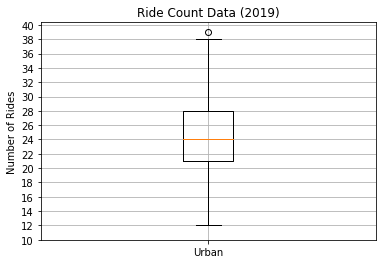

In [112]:
#creating a box n whisker plot
#use ax.boxplot()

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

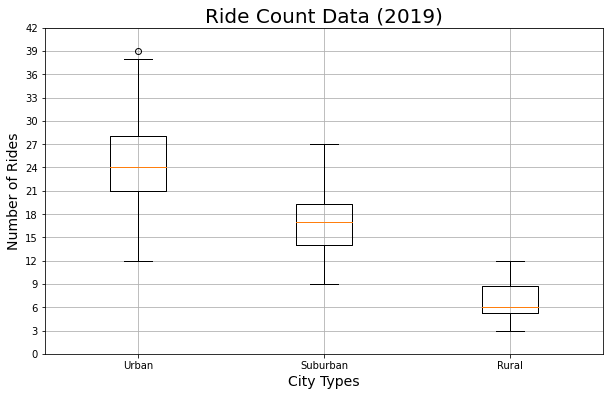

In [114]:
 # Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("resources/Fig2.png")
plt.show()

In [115]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


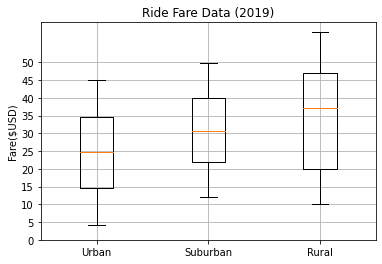

In [118]:
#create box n whisker plot for ride fare data 
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.savefig("resources/Fig3.png")
plt.show()

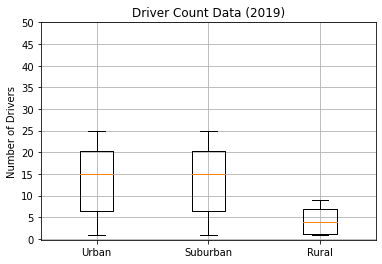

In [121]:
#create box n whisker plot for driver count 

x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [suburban_drivers_avg, suburban_drivers_avg, rural_drivers_avg]
fig, ax = plt.subplots()
ax.boxplot(driver_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.savefig("resources/Fig4.png")
plt.show()

In [124]:
#get the percentage of fares for each city type and display on a pie chart 
#Get the total fares for each city type.


# Get the sum of the fares for each city type.
sum_fares_by_type = city_ride_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [125]:
# Get the total for all the fares for all the city types.

total_fares = city_ride_df["fare"].sum()
total_fares

63538.64

In [126]:
# Calculate the percentage of the total fares for each city type.
# type_percents = 100 * sum_fares_by_type / total_fares
# type_percents
#or
type_percents = 100 * city_ride_df.groupby(["type"]).sum()["fare"] / city_ride_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

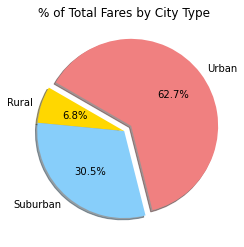

In [127]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

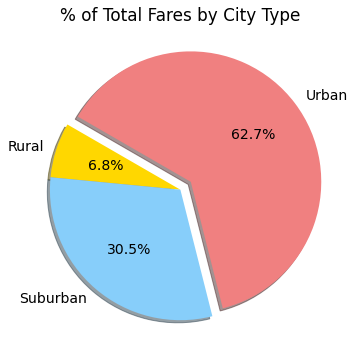

In [129]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("resources/Fig5.png")
# Show Figure
plt.show()
